# NLP 101

minibootcamp dphi

Understand the interaction between computers and human language.

Some applications are : 

* Information retrieval
* Sentiment Ananlysis
* Information Extration
* Machine Traslation
* Question Answering
* Classification, Clustering and Similarity

<img src="Captura.PNG">

## Text Preprocessing 

<img src="Captura2.PNG">

### Case Conversion

In [1]:
text='Club deportivo Universidad Catolica'
text

'Club deportivo Universidad Catolica'

In [2]:
print(f'{text.lower()} \n{text.upper()} \n {text.title()}')

club deportivo universidad catolica 
CLUB DEPORTIVO UNIVERSIDAD CATOLICA 
 Club Deportivo Universidad Catolica


### Tokenization

In [3]:
import nltk

In [4]:
sample_text = ("US unveils world's most powerful supercomputer, beats China. " 
               "The US has unveiled the world's most powerful supercomputer called 'Summit', " 
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [5]:
nltk.sent_tokenize(sample_text) ## fila con comas

["US unveils world's most powerful supercomputer, beats China.",
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight.",
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.',
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

In [6]:
print(nltk.word_tokenize(sample_text)) # Hace que cada set de string que no se encuentra separado por un espacio quede separado por ,

['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the', 'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.']


In [7]:
import spacy # Otra forma de hacer lo midsmo 

In [8]:
nlp = spacy.load('en_core_web_md')
text_spacy = nlp(sample_text)
## sentenciaa
[obj.text for obj in text_spacy.sents]

["US unveils world's most powerful supercomputer, beats China.",
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight.",
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.',
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

In [9]:
## tokenizate
print([obj.text for obj in text_spacy])

['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating', 'the', 'previous', 'record', '-', 'holder', 'China', "'s", 'Sunway', 'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.']


### Removing HTML tags and Noise

In [10]:
import requests

data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.text
print(content[6100:8000])

rgin-top: 2em">*** START OF THE PROJECT GUTENBERG EBOOK, THE BIBLE, KING JAMES, BOOK 1***</p>

<p id="id00012" style="margin-top: 4em">This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.</p>

<h1 id="id00013" style="margin-top: 5em">Book 01        Genesis</h1>

<p id="id00014">01:001:001 In the beginning God created the heaven and the earth.</p>

<p id="id00015" style="margin-left: 0%; margin-right: 0%">01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.</p>

<p id="id00016">01:001:003 And God said, Let there be light: and there was light.</p>

<p id="id00017">01:001:004 And God saw the light, that it was good: and God divided the<br>

           light from the darkness.<br>
</p>

<p id="id00018">01:001:005 And God called the light Day, and the darkness he called<br>

       

In [11]:
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[6100:8000])

f the earth, and to every fowl of the air,
           and to every thing that creepeth upon the earth, wherein there
           is life, I have given every green herb for meat: and it was
           so.
01:001:031 And God saw every thing that he had made, and, behold, it was
           very good. And the evening and the morning were the sixth day.
01:002:001 Thus the heavens and the earth were finished, and all the host
           of them.
01:002:002 And on the seventh day God ended his work which he had made;
           and he rested on the seventh day from all his work which he
           had made.
01:002:003 And God blessed the seventh day, and sanctified it: because
           that in it he had rested from all his work which God created
           and made.
01:002:004 These are the generations of the heavens and of the earth when
           they were created, in the day that the LORD God made the earth
           and the heavens,
01:002:005 And every plant of the field before it wa

### Removing Accented Characters

In [12]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [13]:
texto='únívérsídád cátólícá'
texto,remove_accented_chars(texto)

('únívérsídád cátólícá', 'universidad catolica')

### Special Characters

In [14]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

In [15]:
texto = "Club Deportivo Universidad Catolica #1 !!!!!!! 🙂🙂🙂"

In [16]:
remove_special_characters(texto)

'Club Deportivo Universidad Catolica 1  '

### Contractions

In [17]:
!pip install contractions
!pip install textsearch

In [18]:
import contractions
list(contractions.contractions_dict.items())[:10]

[("I'm", 'I am'),
 ("I'm'a", 'I am about to'),
 ("I'm'o", 'I am going to'),
 ("I've", 'I have'),
 ("I'll", 'I will'),
 ("I'll've", 'I will have'),
 ("I'd", 'I would'),
 ("I'd've", 'I would have'),
 ('Whatcha', 'What are you'),
 ("amn't", 'am not')]

In [19]:
texto='''They aren't playing football cause They doesn't have ball'''

In [20]:
contractions.fix(texto)

'They are not playing football because They does not have ball'

### Stemming 

In [21]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [23]:
# lemmatize nouns
print(wnl.lemmatize('notebooks', 'n'))
print(wnl.lemmatize('boxes', 'n'))

notebook
box


In [24]:
# lemmatize verbs
print(wnl.lemmatize('ran', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [25]:
# lemmatize adjectives
print(wnl.lemmatize('poorest', 'a'))
print(wnl.lemmatize('ugliest', 'a'))

poor
ugly


In [26]:
s = 'The brown foxes are quick and they are jumping over the sleeping lazy dogs!'

In [27]:
tokens = nltk.word_tokenize(s)
lemmatized_text = ' '.join(wnl.lemmatize(token) for token in tokens)
lemmatized_text

'The brown fox are quick and they are jumping over the sleeping lazy dog !'

In [28]:
### Pos Tagging

In [30]:
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    return new_tagged_tokens

In [31]:
wordnet_tokens = pos_tag_wordnet(tagged_tokens)
print(wordnet_tokens)

[('The', 'n'), ('brown', 'a'), ('foxes', 'n'), ('are', 'v'), ('quick', 'a'), ('and', 'n'), ('they', 'n'), ('are', 'v'), ('jumping', 'v'), ('over', 'n'), ('the', 'n'), ('sleeping', 'v'), ('lazy', 'a'), ('dogs', 'n'), ('!', 'n')]


### Effective Lemmatization 

In [32]:
lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
lemmatized_text

'The brown fox be quick and they be jump over the sleep lazy dog !'

### Lemmatization with Spacy

In [34]:
import spacy
nlp = spacy.load('en_core_web_md')

def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [35]:
spacy_lemmatize_text(s)

'the brown fox be quick and they be jump over the sleep lazy dog !'

### Stopword Removal

In [36]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [37]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [38]:
remove_stopwords(s, is_lower_case=False)

'brown foxes quick jumping sleeping lazy dogs !'

## Text Representation with Feature Engineering

Bootcamp NLP -dphi

How I do the engineering for transform free text in numeric features?

### Sample Corpus



Es la muestra

In [39]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [40]:
#### Pre-procesing
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) ## caracteres especiales
    doc = doc.lower() ## Todo a minuscula
    doc = doc.strip() ## Eliminas espacios
    # tokenize document
    tokens = nltk.word_tokenize(doc) 
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words] ## Saca los y,o, en etc
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

### Bag of Words Model

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [42]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

### La matriz esta ordenada por abcdario y pero las filas estan ordenadas, cada fila es un elemento del vector

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


### Bag of N-Grams Model

Lo mismo pero ahora mezcla n secuencia de tokens.

In [43]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model

El problema de los bags es que se basan en frecuencia absoluta entonces para una corpora en particular pueden haber tokens que hagan que el efecto relativo de las otras palabras sea menor

Term Frequency-Inverse Document Frequency usa un factor de normalizacion para tratar con esto 

$\text{tfidf}(w,D)=\text{tf}(w,D)\text{idf}(w,D)$

,donde tf es la frecuencia de la palabra w en el documento D y idf la inversa de la frecuencia del documento que la define como el log del total de Documentos($D$) en el Corpus($C$) dividido por la cantidad de documentos que contienen la palabra w. 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### Document Similarity

Entrega una matriz como de cuan parecidos son casa frase o document, classic nxn. 

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


### Ex Clustering with Document Similarity

In [46]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Text Representacion with New Deep Learning Models

La idea es explorar formas mas sofisticas que no se basen en solo metricas de conteo, si no que tambien capturen la semantica. 

### Sample Corpus 

In [47]:
import pandas as pd
import numpy as np

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Simple pre processing

In [48]:
import nltk
import re


stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

### The Word2Vec Model

* Google 2013

* Menor dimencionalidad y mayor densidad en la matriz comparado a metodos tradicionales de Bag of Words

Use two types of Architectures:
    
   * The continuous Bag of Words (CBOW) Model.
   
   Este se trata de intentar predecir la palabra que se encuentra al medio en funcion de las que la rodean.  Por ejemplo: 'Un auto familiar gris choca con un auto rojo deportivo'.
   
   Entonces, por ejemplo:
   
   $x=(auto,gris)\:\rightarrow f(x)=familiar$
   $x=(auto,deportivo)\:\rightarrow f(x)=rojo$

   
   A x se le llama el context window y a f(x) el target word. 
   
   * The Skip-gram Model. 
    
   Hace lo del CBOW pero al reves, esto implica
    
    

#### Robust Word2Vec Model with Gensim

Ocupa estos parametros :

* size: The word embedding dimensionality
* window: The context window size
* min_count: The minimum word count
* sample: The downsample setting for frequent words
* sg: Training model, 1 for skip-gram otherwise CBOW

In [52]:
import nltk
from gensim.models import word2vec

In [53]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample,epochs=5000)
w2v_model

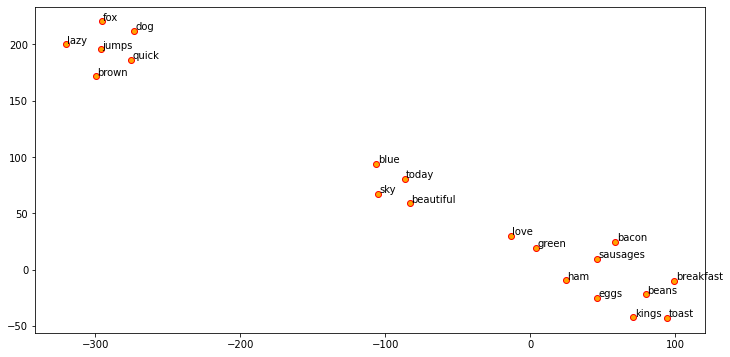

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [55]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,-0.639432,-0.024679,1.502709,0.610270,-0.721669,-0.316005,0.965002,1.001847,-0.234204,0.705497,0.514538,0.877368,-0.751616,-0.470609,0.071282
blue,-0.602743,0.073659,0.724945,0.157942,-0.789465,0.215237,0.614432,0.679531,-0.048113,0.658686,0.095931,0.815805,-0.159200,-0.532422,-0.248695
lazy,-0.988989,0.319340,0.843687,-1.026609,-0.590684,0.173463,0.259514,-0.637999,0.504987,0.112339,-0.474345,1.303706,-0.684338,-1.083380,0.311884
beautiful,-0.544188,-0.353933,1.410363,0.720159,-0.013280,-0.414286,0.896078,0.552768,-0.145792,1.038409,0.312691,0.896521,-0.635649,-0.480671,0.334769
quick,-0.789416,0.323791,0.290438,-0.849889,-0.650918,0.278436,-0.141102,-0.187405,0.451341,0.482975,0.027598,1.579678,-0.351136,-1.142641,0.484352
brown,-0.712770,0.695081,0.521078,-0.705848,-1.008142,0.141744,0.080199,-0.064908,0.848459,-0.062610,-0.022713,1.501421,-0.514936,-0.974268,0.667429
fox,-0.896241,0.404933,0.753256,-0.695366,-0.435905,0.327127,-0.346009,-0.465849,0.637149,0.599076,-0.256180,1.590770,-0.236885,-0.898548,0.597680
dog,-0.949771,0.453110,0.776009,-0.624677,-0.637290,0.142310,-0.439198,-0.422219,0.756097,0.316867,0.205115,1.447336,-0.020938,-0.981581,0.459399
sausages,0.198648,0.176316,1.074163,-0.299473,1.010429,0.748644,-0.166153,0.556175,-0.244341,0.325445,0.850126,-0.310548,-0.408820,-0.935457,0.673599
ham,0.297497,0.631223,1.108528,0.457518,1.037477,1.027660,-0.164433,0.289555,-0.268838,-0.167446,0.689474,0.043164,-0.524910,-0.758180,0.730475


Generamos la data

In [56]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,lazy,beautiful,quick,brown,fox,dog,sausages,ham,bacon,eggs,love,breakfast,kings,green,jumps,toast,beans,today
sky,1.000000,0.884443,0.404548,0.928573,0.403114,0.446656,0.376840,0.388981,0.293115,0.277195,0.349490,0.310484,0.670830,0.134928,0.197749,0.421173,0.311042,0.172593,0.185005,0.962221
blue,0.884443,1.000000,0.544603,0.769207,0.599867,0.584544,0.544614,0.545837,0.151053,0.112449,0.238992,0.161952,0.448391,0.067489,0.083450,0.277041,0.522448,0.100712,0.094574,0.871929
lazy,0.404548,0.544603,1.000000,0.386370,0.906429,0.899321,0.914341,0.878318,0.123732,0.101477,0.115611,0.104955,0.098807,0.204776,0.200766,0.139880,0.944066,0.173519,0.202247,0.341223
beautiful,0.928573,0.769207,0.386370,1.000000,0.376902,0.351269,0.404056,0.367527,0.358419,0.328147,0.413883,0.319331,0.682948,0.167741,0.195188,0.398091,0.262262,0.160075,0.171848,0.945873
quick,0.403114,0.599867,0.906429,0.376902,1.000000,0.931961,0.954882,0.941377,0.170716,0.120554,0.137238,0.133597,0.058925,0.270315,0.215114,0.066787,0.968901,0.257749,0.216935,0.394572
brown,0.446656,0.584544,0.899321,0.351269,0.931961,1.000000,0.897303,0.915842,0.099398,0.129835,0.096733,0.164160,0.052679,0.222446,0.239225,0.083757,0.947395,0.242752,0.239352,0.366445
fox,0.376840,0.544614,0.914341,0.404056,0.954882,0.897303,1.000000,0.965174,0.183718,0.176364,0.129820,0.147126,0.068539,0.227387,0.190613,0.113491,0.952296,0.195343,0.193750,0.353357
dog,0.388981,0.545837,0.878318,0.367527,0.941377,0.915842,0.965174,1.000000,0.174181,0.161865,0.056952,0.135042,0.108004,0.217166,0.177226,0.116675,0.945430,0.202507,0.174167,0.354797
sausages,0.293115,0.151053,0.123732,0.358419,0.170716,0.099398,0.183718,0.174181,1.000000,0.883754,0.899111,0.887931,0.755130,0.912560,0.855671,0.867339,0.161442,0.880381,0.888253,0.315121
ham,0.277195,0.112449,0.101477,0.328147,0.120554,0.129835,0.176364,0.161865,0.883754,1.000000,0.866839,0.890548,0.682801,0.811592,0.843729,0.855219,0.158935,0.811822,0.882894,0.254957


In [57]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky           [today, beautiful, blue]
blue           [sky, today, beautiful]
lazy               [jumps, fox, quick]
beautiful           [today, sky, blue]
quick                [jumps, fox, dog]
brown              [jumps, quick, dog]
fox                [dog, quick, jumps]
dog                [fox, jumps, quick]
sausages     [breakfast, bacon, beans]
ham            [eggs, sausages, beans]
bacon           [sausages, beans, ham]
eggs               [kings, beans, ham]
love           [green, sausages, eggs]
breakfast     [beans, toast, sausages]
kings             [toast, beans, eggs]
green            [sausages, eggs, ham]
jumps              [quick, fox, brown]
toast        [kings, beans, breakfast]
beans        [kings, toast, breakfast]
today           [sky, beautiful, blue]
dtype: object

In [58]:
import spacy
nlp = spacy.load('en_core_web_md')
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 20000


In [59]:
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)
vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ham,-0.773320,-0.282540,0.580760,0.841480,0.258540,0.585210,-0.021890,-0.463680,0.139070,0.65872,...,0.464470,0.481400,-0.829200,0.354910,0.224530,-0.493920,0.456930,-0.649100,-0.131930,0.372040
jumps,-0.334840,0.215990,-0.350440,-0.260020,0.411070,0.154010,-0.386110,0.206380,0.386700,1.46050,...,-0.107030,-0.279480,-0.186200,-0.543140,-0.479980,-0.284680,0.036022,0.190290,0.692290,-0.071501
dog,-0.401760,0.370570,0.021281,-0.341250,0.049538,0.294400,-0.173760,-0.279820,0.067622,2.16930,...,0.022908,-0.259290,-0.308620,0.001754,-0.189620,0.547890,0.311940,0.246930,0.299290,-0.074861
sky,0.312550,-0.303080,0.019587,-0.354940,0.100180,-0.141530,-0.514270,0.886110,-0.530540,1.55660,...,-0.667050,0.279110,0.500970,-0.277580,-0.143720,0.342710,0.287580,0.537740,0.363490,0.496920
brown,-0.374120,-0.076264,0.109260,0.186620,0.029943,0.182700,-0.631980,0.133060,-0.128980,0.60343,...,-0.015404,0.392890,-0.034826,-0.720300,-0.365320,0.740510,0.108390,-0.365760,-0.288190,0.114630
breakfast,0.073378,0.227670,0.208420,-0.456790,-0.078219,0.601960,-0.024494,-0.467980,0.054627,2.28370,...,0.647710,0.373820,0.019931,-0.033672,-0.073184,0.296830,0.340420,-0.599390,-0.061114,0.232200
blue,0.129450,0.036518,0.032298,-0.060034,0.399840,-0.103020,-0.507880,0.076630,-0.422920,0.81573,...,-0.501280,0.169010,0.548250,-0.319380,-0.072887,0.382950,0.237410,0.052289,0.182060,0.412640
sausages,-0.481340,0.023467,0.396470,0.364770,-0.083069,0.684590,0.007079,-0.210320,-0.021993,0.81876,...,0.602560,0.297010,-0.543030,-0.169150,-0.689910,-0.307360,0.193250,-0.634980,0.183010,0.285290
love,0.139490,0.534530,-0.252470,-0.125650,0.048748,0.152440,0.199060,-0.065970,0.128830,2.05590,...,-0.124380,0.178440,-0.099469,0.008682,0.089213,-0.075513,-0.049069,-0.015228,0.088408,0.302170
bacon,-0.430730,-0.016025,0.484620,0.101390,-0.299200,0.761820,-0.353130,-0.325290,0.156730,0.87321,...,0.304240,0.413440,-0.540730,-0.035930,-0.429450,-0.246590,0.161490,-1.065400,-0.244940,0.269540


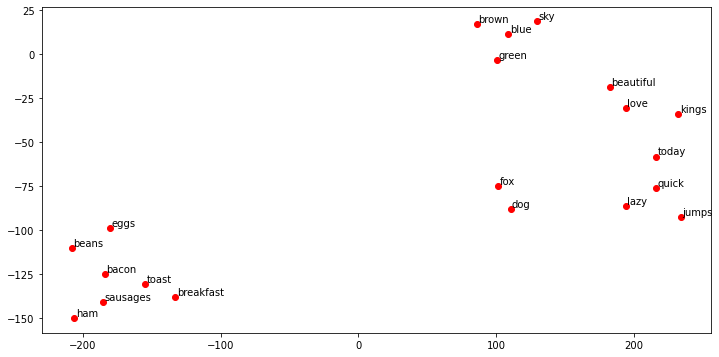

In [60]:
### t-SNE

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [61]:
### Semantic similarity
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,ham,jumps,dog,sky,brown,breakfast,blue,sausages,love,bacon,eggs,beans,lazy,kings,green,fox,beautiful,today,quick,toast
ham,1.000000,0.046432,0.262579,0.174496,0.335111,0.371688,0.185452,0.710515,0.218128,0.738816,0.489116,0.495773,0.222571,0.127651,0.290761,0.209454,0.110936,0.104115,0.191665,0.500586
jumps,0.046432,1.000000,0.307960,0.278595,0.110400,0.103865,0.187263,0.100810,0.185114,0.091021,0.150622,0.095544,0.222112,0.086659,0.150752,0.250834,0.142554,0.142099,0.301096,0.119099
dog,0.262579,0.307960,1.000000,0.219087,0.341204,0.295957,0.314065,0.326413,0.358715,0.295123,0.291202,0.230778,0.301678,0.156674,0.272693,0.485855,0.280658,0.223730,0.299892,0.182994
sky,0.174496,0.278595,0.219087,1.000000,0.408844,0.205429,0.627800,0.077070,0.351084,0.172964,0.223585,0.160064,0.259361,0.263785,0.488385,0.303459,0.428081,0.256770,0.192515,0.216372
brown,0.335111,0.110400,0.341204,0.408844,1.000000,0.277158,0.683011,0.404895,0.331943,0.432891,0.466903,0.453427,0.256875,0.193487,0.646850,0.406912,0.355700,0.147418,0.217009,0.347578
breakfast,0.371688,0.103865,0.295957,0.205429,0.277158,1.000000,0.197103,0.484660,0.245735,0.487737,0.431108,0.378215,0.319941,0.161841,0.288437,0.165064,0.314472,0.288788,0.358221,0.513436
blue,0.185452,0.187263,0.314065,0.627800,0.683011,0.197103,1.000000,0.184090,0.364961,0.242987,0.297546,0.261304,0.230513,0.207656,0.764083,0.371178,0.461366,0.180088,0.220331,0.232264
sausages,0.710515,0.100810,0.326413,0.077070,0.404895,0.484660,0.184090,1.000000,0.229077,0.823075,0.565044,0.596148,0.227305,0.100838,0.333903,0.214655,0.135784,0.133225,0.260431,0.543087
love,0.218128,0.185114,0.358715,0.351084,0.331943,0.245735,0.364961,0.229077,1.000000,0.292268,0.254177,0.249891,0.339280,0.263805,0.327302,0.255050,0.594738,0.371650,0.292446,0.274246
bacon,0.738816,0.091021,0.295123,0.172964,0.432891,0.487737,0.242987,0.823075,0.292268,1.000000,0.620539,0.617909,0.264376,0.146716,0.386664,0.210082,0.151157,0.158949,0.265370,0.622701


In [62]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

ham              [bacon, sausages, toast]
jumps                   [dog, quick, sky]
dog                    [fox, love, brown]
sky              [blue, green, beautiful]
brown                 [blue, green, eggs]
breakfast        [toast, bacon, sausages]
blue                  [green, brown, sky]
sausages              [bacon, ham, beans]
love             [beautiful, today, blue]
bacon              [sausages, ham, toast]
eggs             [bacon, beans, sausages]
beans             [bacon, sausages, eggs]
lazy             [quick, love, breakfast]
kings                    [love, sky, fox]
green                  [blue, brown, sky]
fox                    [dog, brown, blue]
beautiful               [love, blue, sky]
today            [love, quick, beautiful]
quick            [lazy, today, breakfast]
toast        [bacon, sausages, breakfast]
dtype: object

### The FastText Model 

A extension of vanilla World2Vec, Facebook 2016. 
El paper https://arxiv.org/pdf/1607.04606.pdf. 

Para el World2Vec cada palabra es un unidad de medidad, pero para FastText cada palabra esta compuesta de n-grams, por eso se llama un subword model. 

En general se genera entre 3 y 6 n-grams. Esto hace que exista mayor probabilidad de una buena representacion de palabras extrañas. 



#### Robust FastText Model with Gensim

In [67]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, vector_size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, epochs=5000)
ft_model

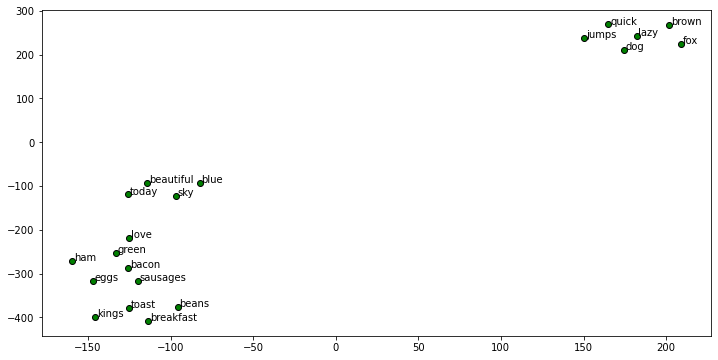

In [69]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [70]:
### Similirities
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))

0.3631966
0.9523557


### Getting document level embeddings. 

In [73]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key )
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [74]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.633224,0.241109,1.336286,0.227798,-0.196780,-0.039579,0.184827,0.730348,0.824477,0.126218,-0.025842,-0.348504,0.098324,-0.786467,0.234595
1,0.558180,0.151005,1.171184,0.287862,-0.219503,-0.049056,0.193210,0.688771,0.583352,0.177741,-0.110026,-0.388595,0.054427,-0.672323,0.224093
2,-0.714791,-0.460922,1.369773,-0.143889,0.404819,0.906332,0.107537,0.466878,0.489146,-0.690582,0.451690,0.332470,-0.088589,-0.898453,-0.215381
3,-0.369935,-0.693844,0.548159,0.798238,-0.120878,0.261229,0.257672,1.025583,-0.979814,0.572465,-0.527470,-0.788771,-0.573670,-0.596745,0.486590
4,-0.005354,-0.499769,0.598558,0.644029,-0.199926,0.119552,0.221546,0.770649,-0.690052,0.469918,-0.544808,-0.664936,-0.435627,-0.498187,0.462443
5,-0.524913,-0.349459,1.343731,-0.115450,0.314273,0.762364,0.118351,0.495899,0.555722,-0.595158,0.390288,0.242537,-0.047782,-0.861928,-0.161288
6,0.675773,0.260902,1.350646,0.276515,-0.224001,-0.084514,0.198552,0.759499,0.851364,0.165621,-0.023771,-0.400847,0.123324,-0.789908,0.229319
7,-0.698170,-0.448786,1.392484,-0.131797,0.401764,0.901194,0.105864,0.462250,0.512573,-0.685103,0.454156,0.336223,-0.081693,-0.904762,-0.211872


#### Ex Clustering with AffinityPropagation

In [77]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

C:\Users\ignacio.sepulveda\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


Clasifica bien, y no secesita la etiqueta solo las embeddings feature desde word2vec. Para visualizar.

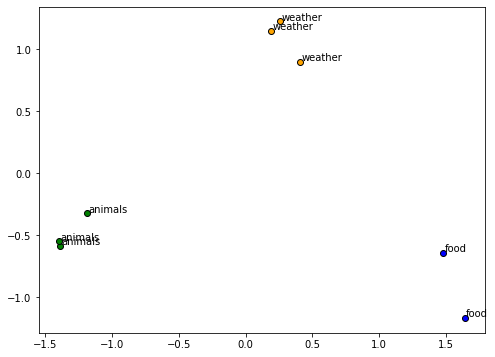

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')

## Movie Recommendations with Document Similarity

En general hay tres formas de hacer recomendadores:
    
   * Simple Rule-based Reccomenders: Se basa en especificas metricas globales y limites, como popularity, global ratings etcs.
   
   * Content-based Recommenders: el nombre lo dice
   
   * Colaborative filtering: Usamos info historica de otros usuarios. 
   
   

In [79]:
import nltk

In [80]:
import pandas as pd

df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [81]:
df = df[['title', 'tagline', 'overview', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df = df.sort_values(by=['popularity'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 546 to 4553
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   popularity   4800 non-null   float64
 4   description  4800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 225.0+ KB


### Document Similarity

#### Cosine Similarity

In [ ]:
import nltk
import re
import numpy as np
import contractions

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

### Extract TF-IDF Features

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20471)

### Compute Pairwise Document Similarity

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.000000,0.000000,0.000000,0.006071,0.008067,0.0,0.000000,0.0,0.000000,...,0.018758,0.000000,0.037930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.009646
1,0.000000,1.000000,0.000000,0.017839,0.007968,0.000000,0.0,0.012501,0.0,0.014840,...,0.000000,0.000000,0.017564,0.0,0.019152,0.000000,0.000000,0.000000,0.000000,0.007963
2,0.000000,0.000000,1.000000,0.000000,0.017178,0.000000,0.0,0.000000,0.0,0.024326,...,0.000000,0.006903,0.005024,0.0,0.012893,0.000000,0.025975,0.000000,0.027126,0.009340
3,0.000000,0.017839,0.000000,1.000000,0.000000,0.022414,0.0,0.000000,0.0,0.037207,...,0.000000,0.060846,0.025039,0.0,0.036237,0.030516,0.022605,0.000000,0.000000,0.000000
4,0.006071,0.007968,0.017178,0.000000,1.000000,0.004673,0.0,0.064581,0.0,0.000000,...,0.022064,0.019662,0.036561,0.0,0.015826,0.000000,0.076033,0.004516,0.043475,0.011465


### Result

In [86]:
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Minions', 'Interstellar', 'Deadpool', ..., 'Penitentiary',
        'Alien Zone', 'America Is Still the Place'], dtype=object),
 (4800,))

In [88]:
## Movie id
movie_idx = np.where(movies_list == 'Minions')[0][0]
print(f'id_minions {movie_idx}')

## Similarities
movie_similarities = doc_sim_df.iloc[movie_idx].values
print(f'Similitudues {movie_similarities}')

## id de 5 con mayor similitud
similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
print(f'top 5 {similar_movie_idxs}')

## Nombres
similar_movies = movies_list[similar_movie_idxs]
similar_movies
print(f'Nombres top 5 {similar_movies}')


id_minions 0
Similitudues [1.         0.         0.         ... 0.         0.         0.00964646]
top 5 [ 33  60 737 490 298]
Nombres top 5 ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Superman'
 'Rise of the Guardians']


#### Get popular movie Recommendations

In [91]:
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

In [92]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl',
              'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys', 
              'Captain America: Civil War', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice', 
              'Pulp Fiction', 'The Godfather', 'The Shawshank Redemption', 'The Lord of the Rings: The Fellowship of the Ring',  
              'Harry Potter and the Chamber of Secrets', 'Star Wars', 'The Hobbit: The Battle of the Five Armies',
              'Iron Man']

In [93]:
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie, movies=movies_list, doc_sims=doc_sim_df))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Superman'
 'Rise of the Guardians']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'Space Pirate Captain Harlock' 'Space Cowboys'
 'Starship Troopers' 'Final Destination 2']

Movie: Deadpool
Top 5 recommended Movies: ['Silent Trigger' 'Underworld: Evolution' 'Bronson' 'Shaft' 'Don Jon']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park'
 "National Lampoon's Vacation" 'The Nut Job' 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ["Pirates of the Caribbean: Dead Man's Chest"
 'Pirates of the Caribbean: On Stranger Tides' 'The Pirate'
 'The Pirates! In an Adventure with Scientists!' 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'The Other End of the Line'
 'Chicago Overcoat

## Predicting E-Commerce Product Reccomendation Raings from Reviews. 

In [95]:
## Basic dependencies

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

## Data 
df = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/feature_engineering_session_dhs18/master/ecommerce_product_ratings_prediction/Womens%20Clothing%20E-Commerce%20Reviews.csv', keep_default_na=False)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


### Data processing

In [96]:
df['Review'] = (df['Title'].map(str) +' '+ df['Review Text']).apply(lambda row: row.strip())
df['Rating'] = [1 if rating > 3 else 0 for rating in df['Rating']]
df = df[['Review', 'Rating']]
df.head()

,Review,Rating
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so...,0
3,"My favorite buy! I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,Flattering shirt This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love ...,1


In [98]:
## removemos los sin review
df = df[df['Review'] != '']
df.info(),df['Rating'].value_counts() # imbalance data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  22642 non-null  object
 1   Rating  22642 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.7+ KB


(None,
 1    17449
 0     5193
 Name: Rating, dtype: int64)

### Split data

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Review']], df['Rating'], random_state=42)
X_train.shape, X_test.shape

((16981, 1), (5661, 1))

In [101]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({1: 13059, 0: 3922}), Counter({1: 4390, 0: 1271}))

### Experiment 1

Solo con count data. 

* **Word Count**: total number of words in the documents
* **Character Count**: total number of characters in the documents
* **Average Word Density**: average length of the words used in the documents
* **Puncutation Count**: total number of punctuation marks in the documents
* **Upper Case Count**: total number of upper count words in the documents
* **Title Word Count**: total number of proper case (title) words in the documents

In [102]:
import string

X_train['char_count'] = X_train['Review'].apply(len)
X_train['word_count'] = X_train['Review'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test['Review'].apply(len)
X_test['word_count'] = X_test['Review'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [103]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
12896,Soooo soft! This is a delightfully soft and fluffy sweater. i might have bought it if my store had the petite size. the white was pretty and a good weight (not too light or heavy) and comfortable....,268,52,5.056604,8,2,0
13183,"Had my eye on this, but dind't get I finally visited a store with petite, and this dress was there, so of course, i snagged it to try on... i love the colors, i mean awesome, the fabric is also ve...",399,84,4.694118,20,2,1
1496,"I wanted to like this... I wanted to like this top so so so so badly. so badly in fact, that after the first size didn't fit, i ordered two other sizes to make sure: xl, l, m. none of them worked ...",525,104,5.000000,19,2,2
5205,"Beautiful blouse Bought this for my daughter in law's birthday. it's just a beautiful, feminine design, well made, nice fabric.. she can wear this for work or for lunch or an evening out. very ver...",203,35,5.638889,10,2,0
13366,"Boxy. large. Boxy, unflattering, and large.\n\ni'm 5'2'' and a curvy 135 pounds. this top (size s) swallowed me, had no shape, and the material didn't feel great either. i wouldn't even purchase i...",295,51,5.673077,22,2,0


#### Logistic Regression 

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

##### Model Evaluation and Metrics - Quick Refresher. 

* **Precision**: The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
* **Recall**: The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
* **F1-score**: The harmonic mean of the precision and recall

Do check out ROC Curve, AUC Score and PR Curve also

In [108]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1271
           1       0.78      1.00      0.87      4390

    accuracy                           0.78      5661
   macro avg       0.39      0.50      0.44      5661
weighted avg       0.60      0.78      0.68      5661



C:\Users\ignacio.sepulveda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ignacio.sepulveda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ignacio.sepulveda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0,1271
1,0,4390


La matriz de confusion muestra que solo predecimos rating 1, vale popo el logic. 

### Experiment 2

#### Features Text Sentiment



Textblob nos permite calcular la polaridad de una oracion, y su subjetitvidad. 

In [115]:
import textblob

textblob.TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [116]:
textblob.TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

In [117]:
x_train_snt_obj = X_train['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [118]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
12896,Soooo soft! This is a delightfully soft and fluffy sweater. i might have bought it if my store had the petite size. the white was pretty and a good weight (not too light or heavy) and comfortable....,268,52,5.056604,8,2,0,0.170455,0.490909
13183,"Had my eye on this, but dind't get I finally visited a store with petite, and this dress was there, so of course, i snagged it to try on... i love the colors, i mean awesome, the fabric is also ve...",399,84,4.694118,20,2,1,0.101944,0.719537
1496,"I wanted to like this... I wanted to like this top so so so so badly. so badly in fact, that after the first size didn't fit, i ordered two other sizes to make sure: xl, l, m. none of them worked ...",525,104,5.000000,19,2,2,0.186538,0.458761
5205,"Beautiful blouse Bought this for my daughter in law's birthday. it's just a beautiful, feminine design, well made, nice fabric.. she can wear this for work or for lunch or an evening out. very ver...",203,35,5.638889,10,2,0,0.625000,0.825000
13366,"Boxy. large. Boxy, unflattering, and large.\n\ni'm 5'2'' and a curvy 135 pounds. this top (size s) swallowed me, had no shape, and the material didn't feel great either. i wouldn't even purchase i...",295,51,5.673077,22,2,0,0.329613,0.510268


#### Model Training and Evaluation

In [119]:
lr.fit(X_train.drop(['Review'], axis=1), y_train, )
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.26      0.38      1271
           1       0.82      0.97      0.89      4390

    accuracy                           0.81      5661
   macro avg       0.75      0.61      0.63      5661
weighted avg       0.79      0.81      0.77      5661



,0,1
0,336,935
1,152,4238


Lo hace un poquito mejor igual lo hace como el poto xdd

### Experiment 3

Adding Bag of Words based Features - 1-grams.


Es la estructura ams simple de representacion matematica de texto no estructurado. 

#### Text Pre-processing and Wrangling

La idea es ver si con feature engineering podemos mejorar. 

We want to extract some specific features based on standard NLP feature engineering models like the classic Bag of Words model. For this we need to clean and pre-process our text data. We will build a simple text pre-processor here since the main intent is to look at feature engineering strategies.

We will focus on:

* Text Lowercasing
* Removal of contractions
* Removing unnecessary characters, numbers and symbols
* Stemming
* Stopword removal

In [120]:
import nltk ## pre-processing
import contractions ## Elimina acortadas
import re ## remueve cosas

In [121]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [122]:
X_train['Clean Review'] = stp(X_train['Review'].values)
X_test['Clean Review'] = stp(X_test['Review'].values)

X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,Clean Review
12896,Soooo soft! This is a delightfully soft and fluffy sweater. i might have bought it if my store had the petite size. the white was pretty and a good weight (not too light or heavy) and comfortable....,268,52,5.056604,8,2,0,0.170455,0.490909,soooo soft thi delight soft fluffi sweater might bought store petit size white wa pretti good weight not light heavi comfort would fun layer variou outfit not seem would
13183,"Had my eye on this, but dind't get I finally visited a store with petite, and this dress was there, so of course, i snagged it to try on... i love the colors, i mean awesome, the fabric is also ve...",399,84,4.694118,20,2,1,0.101944,0.719537,eye thi but dind get final visit store petit thi dress wa cours snag tri love color mean awesom fabric also veri soft but cut wa huh noth go rave think would nice casual day but often wear jogger ...
1496,"I wanted to like this... I wanted to like this top so so so so badly. so badly in fact, that after the first size didn't fit, i ordered two other sizes to make sure: xl, l, m. none of them worked ...",525,104,5.000000,19,2,2,0.186538,0.458761,want like thi want like thi top badli badli fact first size not fit order two size make sure xl l none work realli want like thi top onlin photo make cloth look flatter shirt not least shirt onlin...
5205,"Beautiful blouse Bought this for my daughter in law's birthday. it's just a beautiful, feminine design, well made, nice fabric.. she can wear this for work or for lunch or an evening out. very ver...",203,35,5.638889,10,2,0,0.625000,0.825000,beauti blous bought thi daughter law birthday beauti feminin design well made nice fabric wear thi work lunch even veri versatil
13366,"Boxy. large. Boxy, unflattering, and large.\n\ni'm 5'2'' and a curvy 135 pounds. this top (size s) swallowed me, had no shape, and the material didn't feel great either. i wouldn't even purchase i...",295,51,5.673077,22,2,0,0.329613,0.510268,boxi larg boxi unflatt larg curvi pound thi top size swallow no shape materi not feel great either would not even purchas sale graphic tee much nicer stick splendid sundri


In [125]:
X_train_metadata = X_train.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)
X_test_metadata = X_test.drop(['Review', 'Clean Review'], axis=1).reset_index(drop=True)

X_train_metadata.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
0,268,52,5.056604,8,2,0,0.170455,0.490909
1,399,84,4.694118,20,2,1,0.101944,0.719537
2,525,104,5.000000,19,2,2,0.186538,0.458761
3,203,35,5.638889,10,2,0,0.625000,0.825000
4,295,51,5.673077,22,2,0,0.329613,0.510268


In [123]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1, 1))
X_traincv = cv.fit_transform(X_train['Clean Review']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['Clean Review']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,aa,aaaaandidon,aaaaannnnnnd,aaaah,aaaahmaz,aaah,ab,abbey,abbi,abck,...,zing,zip,zipper,zipperi,zippi,zone,zooland,zoom,zowi,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train_comb = pd.concat([X_train_metadata, X_traincv], axis=1)
X_test_comb = pd.concat([X_test_metadata, X_testcv], axis=1)

X_train_comb.head()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity,aa,aaaaandidon,...,zing,zip,zipper,zipperi,zippi,zone,zooland,zoom,zowi,zuma
0,268,52,5.056604,8,2,0,0.170455,0.490909,0,0,...,0,0,0,0,0,0,0,0,0,0
1,399,84,4.694118,20,2,1,0.101944,0.719537,0,0,...,0,0,0,0,0,0,0,0,0,0
2,525,104,5.000000,19,2,2,0.186538,0.458761,0,0,...,0,0,0,0,0,0,0,0,0,0
3,203,35,5.638889,10,2,0,0.625000,0.825000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,295,51,5.673077,22,2,0,0.329613,0.510268,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Training and Evaluation 

In [127]:
lr.fit(X_train_comb, y_train)
predictions = lr.predict(X_test_comb)

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1271
           1       0.92      0.93      0.93      4390

    accuracy                           0.88      5661
   macro avg       0.84      0.82      0.83      5661
weighted avg       0.88      0.88      0.88      5661



,0,1
0,895,376
1,286,4104


Mejoro harto en comparacion a los demas, supongo que hacer un n-gram mejorara aun mas. 